<a href="https://colab.research.google.com/github/benasphy/Deep-Learning/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0919 - val_loss: 0.0327
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0292 - val_loss: 0.0210
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0203 - val_loss: 0.0171
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0170 - val_loss: 0.0152
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0153 - val_loss: 0.0141
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0142 - val_loss: 0.0132
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0135 - val_loss: 0.0127
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0129 - val_loss: 0.0122
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0125 - val_loss: 0.0119
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0119 - val_los

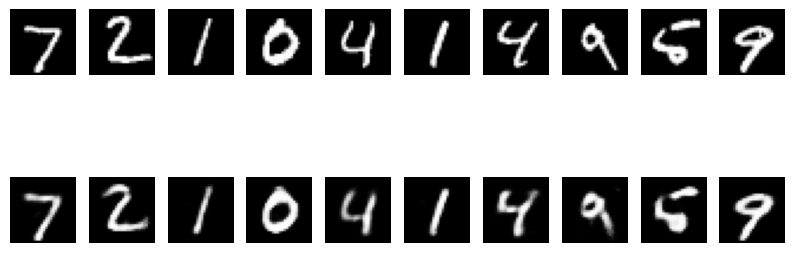

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# 1️⃣ Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0  # Normalize to [0,1]
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape((len(x_train), 28 * 28))  # Flatten images
x_test = x_test.reshape((len(x_test), 28 * 28))

# 2️⃣ Define Autoencoder architecture
encoding_dim = 32  # Latent space size (compressed representation)

# Encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(encoding_dim, activation="relu")(encoded)

# Decoder
decoded = Dense(128, activation="relu")(encoded)
decoded = Dense(784, activation="sigmoid")(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# 3️⃣ Train the Autoencoder
autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# 4️⃣ Test the Autoencoder
decoded_imgs = autoencoder.predict(x_test[:10])

# 5️⃣ Visualize Results
plt.figure(figsize=(10, 4))
for i in range(10):
    # Original
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Reconstructed
    plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()
